In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
from datetime import date
from math import log
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'qpsolvers'

## Read Ticker Symbols from Excel File

In [15]:
df = pd.read_excel('DowStocks.xlsx')

df.head()

,SYMBOL,NAME,PRICE,CHANGE,%CHANGE,LOW,HIGH,PREVIOUS CLOSE
0,AXP,American Express Co,178.86,5.73,3.31,171.21,180.40,173.13
1,AMGN,Amgen Inc,245.17,-1.36,-0.55,242.21,249.96,246.53
2,AAPL,Apple Inc,154.50,3.68,2.44,147.83,157.38,150.82
3,BA,Boeing Co,206.01,-3.33,-1.59,205.62,210.75,209.34
4,CAT,Caterpillar Inc,247.76,2.86,1.17,243.13,250.95,244.90


In [16]:
tickers = list(df["SYMBOL"])

In [17]:
today = date.today()

tickers_df = yf.download(tickers, 
                      start='2020-01-01', 
                      end=today, 
                      progress=False, auto_adjust=True)

tickers_df.head()

Close                                                  \
                 AAPL        AMGN         AXP          BA         CAT   
Date                                                                    
2020-01-02  73.449394  219.691711  120.653046  331.348572  139.186600   
2020-01-03  72.735313  218.200272  119.454674  330.791901  137.254089   
2020-01-06  73.314888  219.874710  118.936966  331.766083  137.161621   
2020-01-07  72.970085  217.806824  118.313805  335.285156  135.349304   
2020-01-08  74.143898  217.971512  120.355843  329.410095  136.551361   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2020-01-02  166.990005  44.065750  105.398460  148.199997  46.004322  ...   
2020-01-03  166.169998  43.346790  105.033928  146.500000  44.865974  ...   
2020-01-06  173.449997  43.501503  104.678062  145.649994  44.686237  ...   
2020-01-07  176.000000  43.219387  103.341370  145.699997  44.669121  ...   
2020-01-08  177.330002  43.246681  102.160904  145.399994  45.131306  ...   

              Volume                                                          \
                 MRK      MSFT      NKE       PG      TRV      UNH         V   
Date                                                                           
2020-01-02   8251428  22622100  5644100  8130800  1117300  2543400   8733000   
2020-01-03   5903698  21116200  4541800  7970500   927300  2711400   4899700   
2020-01-06   7522963  20813700  4612400  6674400   952800  3079100  10109500   
2020-01-07  11132275  21634100  6719900  7583400  1204600  2492900   4392300   
2020-01-08  15200506  27746500  4942200  5385100  1942800  3379200   5712000   

                                         
                  VZ       WBA      WMT  
Date                                     
2020-01-02  11447900   5700500  6764900  
2020-01-03  13263200   4892300  5399200  
2020-01-06  15094500   6003300  6445500  
2020-01-07  14293100   4365700  6846900  
2020-01-08  15926500  17431800  5875800  

[5 rows x 150 columns]

In [18]:
returns = tickers_df['Close'].applymap(log).diff()[1:]
stats = returns.agg(['mean', 'std', 'var'])
annual_returns = stats.transpose()['mean'] * 252
annual_covar = returns.cov() * 252

In [19]:
returns.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.009770,-0.006812,-0.009982,-0.001681,-0.013982,-0.004923,-0.016450,-0.003465,-0.011537,-0.025056,...,-0.008620,-0.012530,-0.002743,-0.006748,-0.003570,-0.010171,-0.007985,-0.010704,0.000000,-0.008867
2020-01-06,0.007937,0.007645,-0.004343,0.002941,-0.000674,0.042878,0.003563,-0.003394,-0.005819,-0.004014,...,0.004265,0.002581,-0.000883,0.001386,0.001094,0.006918,-0.002165,-0.002155,0.008595,-0.002038
2020-01-07,-0.004714,-0.009449,-0.005253,0.010551,-0.013301,0.014595,-0.006506,-0.012852,0.000343,-0.000383,...,-0.026987,-0.009160,-0.000491,-0.006211,-0.014762,-0.006055,-0.002646,-0.011179,-0.005047,-0.009308
2020-01-08,0.015958,0.000756,0.017112,-0.017678,0.008842,0.007528,0.000631,-0.011489,-0.002061,0.010294,...,-0.006749,0.015803,-0.002262,0.004254,0.010671,0.020865,0.016973,0.001844,-0.060129,-0.003438
2020-01-09,0.021018,0.002976,0.017920,0.014887,-0.002509,0.012720,-0.004217,-0.001615,-0.003928,-0.010294,...,0.008765,0.012415,-0.000690,0.010878,0.007366,-0.005694,0.006906,-0.004155,-0.020813,0.010278


In [20]:
annual_returns.head()

AAPL    0.231965
AMGN    0.031790
AXP     0.127404
BA     -0.142380
CAT     0.185470
Name: mean, dtype: float64

## Implement Quadratic Solvers Class

In [21]:
class create_efficient_frontier():
    
    def __init__(self, returns, covar):
        self.returns = np.array(returns)
        self.covar = np.array(covar)
        self.n =len(self.covar)
        self.tickers = list(returns.index)

    def get_portfolio(self, return_target):
        """for a given target return create lowest variance long-only portfolio"""
        P, q = self.covar, np.array([0.] * self.n)
        G, h = None,None 
        A = np.array([annual_returns, np.array([1.0] * self.n)])
        b = np.array([return_target, 1.0])
        lb, ub = np.array([0.] * self.n),np.array([1.] * self.n)

        self.portfolio = solve_qp(P, q, G, h, A, b, lb, ub, solver='quadprog')  # specify solver 02/02/2023
        return {"portfolio":self.portfolio, "risk_ret":self.risk_return()}  # return (allocation , risk-return)

    def risk_return(self):
        """return the risk and return for this portfolio"""
        return np.sqrt(self.portfolio.dot(self.covar.dot(self.portfolio))), self.returns.dot(self.portfolio)

## Create Markowitz Portfolio

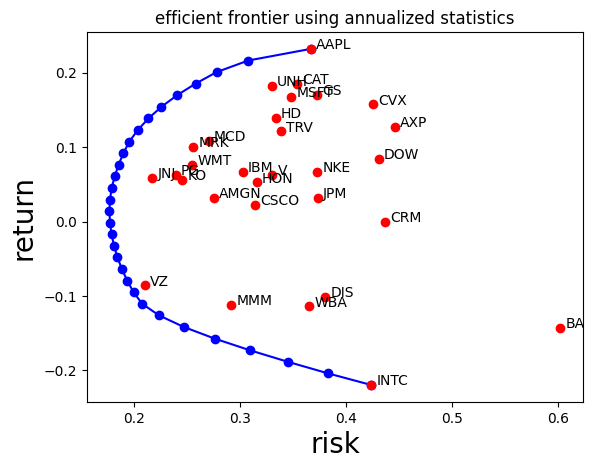

In [22]:
# loop through range of returns to create 20 portfolios on the efficient frontier
    
ef = create_efficient_frontier(annual_returns, annual_covar)
min_return, max_return = min(annual_returns), max(annual_returns)
frontier = np.array([ef.get_portfolio(r)['risk_ret'] for r in np.linspace(min_return, max_return, 30)]).T

# plot the efficient frontier in the Markowitz risk-return space

plt.plot(frontier[0], frontier[1], 'o-', color='blue') # plot the efficient frontier

for n, r, s in zip(annual_returns.index, annual_returns, np.sqrt(np.diag(annual_covar))):
    plt.plot([s], [r], 'o', color='red')
    plt.text(s+0.005, r, n)
    
plt.title('efficient frontier using annualized statistics')
plt.xlabel('risk', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.show()

## Portfolio Weights

In [23]:
frontier_pf = pd.DataFrame(np.array([ef.get_portfolio(r)['portfolio'] 
                     for r in np.linspace(min_return, max_return, 30)]),
                           columns=ef.tickers)
display(frontier_pf[-4:])
frontier.T[-4:]

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
26,0.363904,-9.937501e-17,1.606829e-18,2.241065e-17,2.561122e-01,7.220396e-18,1.777514e-16,1.145884e-17,3.329972e-17,2.080448e-17,...,1.365047e-01,4.740562e-17,-1.923271e-17,3.115791e-17,-1.074976e-17,0.198570,6.765467e-17,-7.470748e-17,-9.938894e-17,4.490845e-02
27,0.431336,-8.677405e-17,8.741491e-17,-3.872622e-17,2.837045e-01,2.504479e-17,2.415206e-16,1.465232e-17,-7.449600e-17,-1.484051e-17,...,4.713352e-02,-4.176779e-17,-5.586575e-17,-6.317485e-17,0.000000e+00,0.237826,-1.587763e-16,2.155293e-32,-1.231915e-16,0.000000e+00
28,0.671155,1.265824e-16,-2.669951e-18,-1.000503e-16,2.294882e-01,2.502958e-17,-1.856876e-16,-2.037674e-17,-1.680339e-16,1.043883e-16,...,1.387779e-17,2.468410e-17,-1.493457e-16,3.018774e-16,6.526601e-17,0.099357,-3.242091e-16,3.039527e-16,-2.453462e-17,-5.394082e-17
29,1.000000,2.944815e-16,-1.741041e-31,-1.349717e-16,5.245804e-15,3.874008e-31,-2.910090e-16,-2.588450e-31,-1.506048e-16,1.191639e-16,...,0.000000e+00,3.482081e-31,-2.245405e-16,2.132245e-16,1.624540e-16,0.000000,-4.979846e-16,3.113369e-16,-6.162976e-31,-1.572979e-16


array([[0.25762106, 0.18526203],
       [0.27750174, 0.20082979],
       [0.30742397, 0.21639755],
       [0.36619747, 0.23196531]])

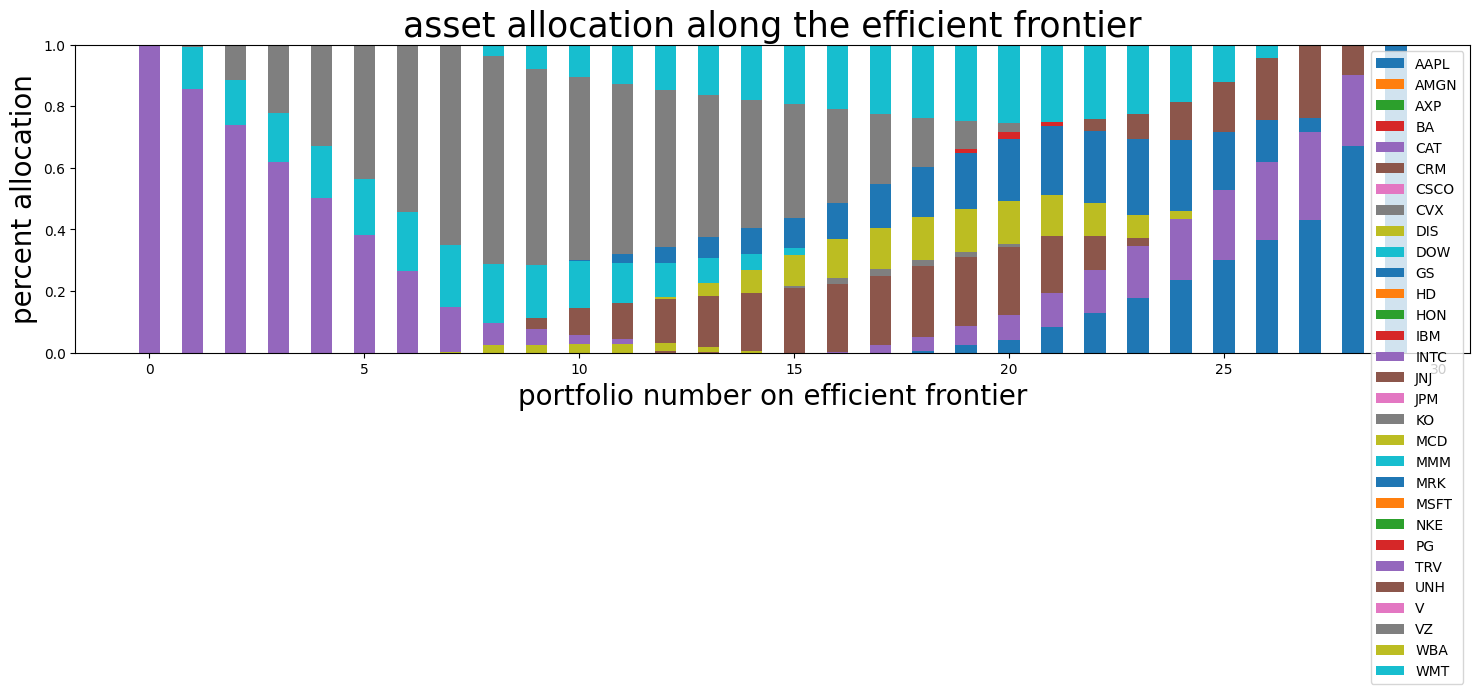

In [24]:
# create stacked bar plot showing security allocations for portfolios on the efficient frontier 

plt.figure(figsize=(18,4))
ind, width = range(len(frontier_pf)), .5  # number of portfolios, the width of each bar in the plot

# loop through portfolios on the efficient frontier

cumulative = [0.] * frontier_pf.shape[0]
for t in frontier_pf.columns:
    plt.bar(ind, frontier_pf[t], width, bottom=cumulative, label=t)
    cumulative += frontier_pf[t]
    
plt.legend(loc= 'best')
plt.title("asset allocation along the efficient frontier", fontsize=25)
plt.ylabel("percent allocation", fontsize=20)
plt.xlabel("portfolio number on efficient frontier", fontsize=20)
plt.show()

In [25]:
frontier1 = np.array([ef.get_portfolio(r) for r in np.linspace(min_return, max_return, 20)]).T
frontier1_portfolio = pd.DataFrame([p['portfolio'] for p in frontier1], columns=ef.tickers)
frontier1_rr = pd.DataFrame([p['risk_ret'] for p in frontier1], columns=['risk','return'])

minVar = [i for i,r in enumerate(frontier1_rr['risk']) if r == frontier1_rr['risk'].min()]

print('minimum variance portfolio')
display(frontier1_rr.iloc[minVar, :])
display(frontier1_portfolio.iloc[minVar, :])

minimum variance portfolio


,risk,return
10,0.176395,0.018113


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
10,-5.069189e-18,-1.274590e-20,2.960295e-17,1.041648e-17,-1.963643e-18,0.0,-4.954882e-17,-9.672697e-18,-7.437556e-19,-4.618485e-17,...,0.101795,3.624568e-17,-1.662238e-18,-3.025589e-17,-1.180315e-17,-1.593382e-17,2.831233e-17,0.356773,-3.665525e-18,0.196683


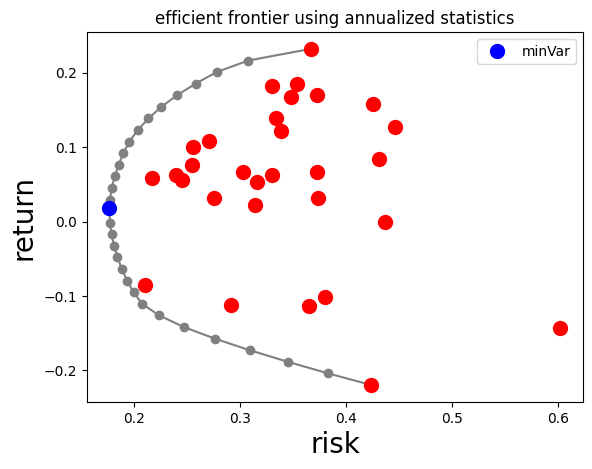

In [26]:
# plot the efficient frontier 

plt.plot(frontier[0], frontier[1], 'o-', color='gray') # plot the efficient frontier
for r, s in zip(annual_returns, np.sqrt(np.diag(annual_covar))):
    plt.plot([s], [r], 'o', color='red', markersize=10) 

# identify the minimum variance portfolio on the plot

mV = frontier1_rr.iloc[minVar, :].values[0]
plt.plot(mV[0],mV[1], 'o', color='blue', markersize=10, label='minVar')

plt.title('efficient frontier using annualized statistics')
plt.xlabel('risk', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.legend()
plt.show()

## Compute 95% VaR from Minimum Variance Portfolio

#### Assume Capital = 1 Million

In [27]:
tickers_df['Close']["AAPL"][-1]

151.00999450683594

In [28]:
last_price = np.zeros(30)

index = 0
for stock_series in tickers_df["Close"]:
    
    last_price[index] = tickers_df['Close'][stock_series][-1]
    index+=1

In [29]:
last_price

array([151.00999451, 242.5       , 179.25      , 212.88999939,
       247.66999817, 167.02999878,  47.25999832, 171.97000122,
       108.05999756,  59.81999969, 371.27999878, 316.54000854,
       200.47000122, 135.6000061 ,  27.79999924, 162.1499939 ,
       141.03999329,  59.61999893, 262.42001343, 113.87999725,
       108.56999969, 263.1000061 , 122.23000336, 138.25999451,
       186.75      , 494.25      , 227.19999695,  40.00999832,
        36.54999924, 143.72000122])

In [30]:
theo_portfolio = last_price * frontier1_portfolio.iloc[minVar, :]

In [31]:
theo_portfolio

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
10,-7.654981e-16,-3.090881e-18,5.306329e-15,2.217565e-15,-4.863355e-16,0.0,-2.341677e-15,-1.663414e-15,-8.037022e-17,-2.762777e-15,...,11.051835,9.536238e-15,-2.031754e-16,-4.183180e-15,-2.204239e-15,-7.875288e-15,6.432561e-15,14.274471,-1.339749e-16,28.267269


In [32]:
w = np.zeros(30)

index = 0
for keys in frontier1_portfolio.iloc[minVar, :]:
    
    w[index] = float(frontier1_portfolio.iloc[minVar, :][keys])
    index += 1

In [33]:
w

array([-5.06918853e-18, -1.27459024e-20,  2.96029529e-17,  1.04164843e-17,
       -1.96364311e-18,  0.00000000e+00, -4.95488172e-17, -9.67269734e-18,
       -7.43755559e-19, -4.61848456e-17,  1.90984311e-17, -1.45554755e-17,
       -5.59788510e-18,  6.87677061e-18, -1.08715219e-17,  2.13273212e-01,
       -1.47060630e-17,  1.04771048e-02,  1.08608084e-01,  1.23915185e-02,
        1.01794554e-01,  3.62456763e-17, -1.66223846e-18, -3.02558938e-17,
       -1.18031526e-17, -1.59338156e-17,  2.83123296e-17,  3.56772608e-01,
       -3.66552482e-18,  1.96682919e-01])

## Compute Volatility of Portfolio Series

In [34]:
returns * 100

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,-0.976965,-0.681193,-0.998204,-0.168143,-1.398160,-0.492261,-1.645018,-0.346461,-1.153726,-2.505565,...,-0.862018,-1.252983,-0.274342,-0.674827,-0.356971,-1.017111,-0.798490,-1.070405,0.000000,-0.886733
2020-01-06,0.793669,0.764457,-0.434335,0.294067,-0.067393,4.287801,0.356283,-0.339385,-0.581899,-0.401413,...,0.426493,0.258143,-0.088346,0.138591,0.109411,0.691786,-0.216507,-0.215467,0.859519,-0.203766
2020-01-07,-0.471413,-0.944934,-0.525320,1.055123,-1.330107,1.459464,-0.650632,-1.285179,0.034325,-0.038311,...,-2.698694,-0.915952,-0.049123,-0.621073,-1.476185,-0.605469,-0.264611,-1.117903,-0.504711,-0.930807
2020-01-08,1.595821,0.075583,1.711225,-1.767792,0.884194,0.752842,0.063133,-1.148872,-0.206117,1.029369,...,-0.674904,1.580284,-0.226225,0.425357,1.067115,2.086486,1.697306,0.184401,-6.012936,-0.343760
2020-01-09,2.101835,0.297611,1.792030,1.488700,-0.250878,1.271978,-0.421745,-0.161537,-0.392787,-1.029369,...,0.876502,1.241549,-0.068958,1.087835,0.736587,-0.569370,0.690613,-0.415450,-2.081335,1.027762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-06,-1.809147,-0.539853,-1.339585,0.387580,1.466433,-1.170286,-2.203834,0.112066,-0.761629,0.149888,...,1.053299,-0.613458,-1.484197,-0.852093,1.751915,0.679858,-0.300278,-0.555623,-2.208080,-0.729501
2023-02-07,1.906184,0.061492,1.250087,3.772061,-0.702483,1.310509,0.565981,2.589384,1.589193,0.696517,...,1.573636,4.116313,-0.318650,-0.980741,1.610696,0.344498,0.816049,-1.784233,1.259953,0.213025
2023-02-08,-1.781038,-1.569633,0.167740,-0.588427,-0.316935,-0.968001,-1.856596,-2.377395,0.134284,-1.163572,...,0.904301,-0.310688,-1.949786,-1.040963,-0.860789,1.320714,-0.485361,-0.074007,-0.491134,-0.540538


In [35]:
index = 0
LAMBDA = 0.97
myList = []

for stock_series in returns:
    
    data = np.array(returns[stock_series])
    L = len(data)
    ewma = np.zeros(L)
    initial_vol = data[0]**2
    ewma[0] = initial_vol
    
    for i in range(1, L):
        
        ewma[i] = LAMBDA * initial_vol + (1 - LAMBDA) * data[i]**2
        initial_vol = ewma[i]
        
    myList.append(ewma)
        
    index += 1
    
myData = np.array(myList).T

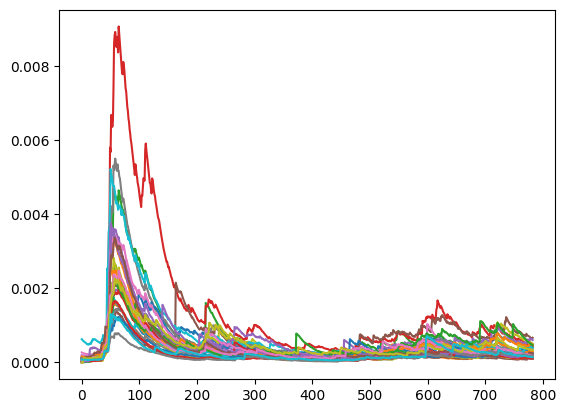

In [36]:
plt.plot(myData)
plt.show()

## Compute Weighted Average

In [37]:
avg = np.zeros(len(myData))

for i in range(len(myData)):
    
    temp = 0
    
    for j in range(30):
        
        temp += myData[i][j] * w[j]
        
    avg[i] = temp
    
avg = np.sqrt(avg)

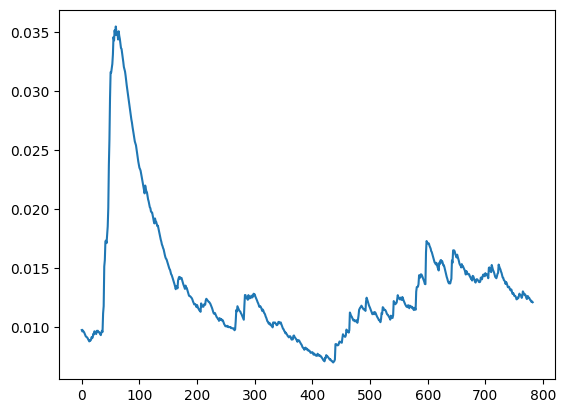

In [38]:
plt.plot(avg)

## Compute Weighted Returns 

In [39]:
weighted_returns = np.zeros(len(returns["AAPL"]))
index = 0

for series in returns:
    
    temp = returns[series]
    
    for j in range(len(temp)):
        
        weighted_returns[j] += temp[j] * w[index]
    
    index += 1

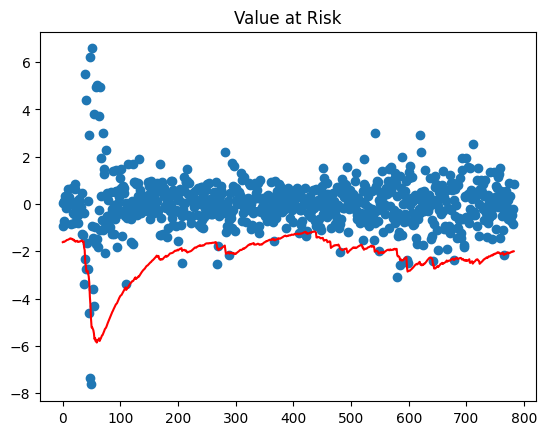

In [41]:
plt.scatter(np.arange(len(weighted_returns)), weighted_returns * 100)
plt.plot(-1.65 * avg * 100, color = 'red')
plt.title("Value at Risk")
plt.show()

In [43]:
count = 0
vol = -1.65 * avg * 100

for i in range(len(weighted_returns)):
    
    if weighted_returns[i] * 100 < vol[i]: 
        count += 1
        
print("Exception Count: ", count)

Exception Count:  15
